In [1]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as inte
import sympy as sp
sp.init_printing()

from matplotlib import animation, rc
from IPython.display import HTML, Image, set_matplotlib_formats
from mpl_toolkits.mplot3d import Axes3D
set_matplotlib_formats('png','pdf')

rc('animation', html='html5')

# Particule chargée dans un champ $(\mathbf E,\mathbf B)$

In [23]:
class Domain:
    
    def __init__(self, xm, ym, zm, I, J, K, tm, N):
        self.xm = xm
        self.xs = np.linspace(0,xm,I)
        self.I = I
        
        self.ym = ym
        self.ys = np.linspace(0,ym,J)
        self.J = J
        
        self.zm = zm
        self.zs = np.linspace(0,zm,K)
        self.K = K
        
        self.grid = np.meshgrid(self.xs, self.ys)
        
        self.tm = tm
        self.times = np.linspace(0, tm, N)
        self.N = N

In [52]:
class Field(Domain):
        
    def E(self,x,y,z,t):
        omega = 10
        return np.array([0,0,10*np.cos(omega*t)])
    
    def B(self,x,y,z,t):
        return np.array([1e-3,0,0])
    
    def Force(self,state,t):
        charge = 1
        pos, vel = state[0:3],state[3:6]
        acc = charge*( self.E(*pos,t) + np.cross(vel, self.B(*pos,t)) )
        return np.concatenate((vel,acc))

In [78]:
class Simu(Field):
    
    def build(self, r0, v0):
        condinit = np.concatenate((r0,v0))
        
        times = self.times
        
        sol = inte.odeint(self.Force, condinit, times)
        self.pos,self.vel = np.hsplit(sol,2)
        
    def graphe(self):
        times = self.times
        fig = plt.figure(1)
        ax = fig.add_subplot(111, projection='3d')
        ax.grid(True)
        ax.plot(times, self.pos, label=r"Trajectoire de la particule")
        return fig

In [79]:
essai = Simu(1,1,1,100,100,100,2,100)

In [80]:
essai.build([0.5,0,0],[0,0,0])

In [84]:
essai.pos.size

In [85]:
essai.times.size

ValueError: setting an array element with a sequence.

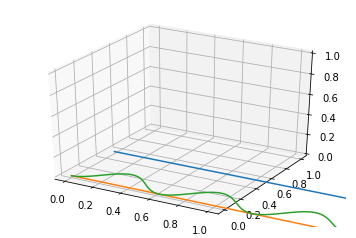

In [82]:
essai.graphe()